# ECE 3 : Homework 5

## Instructions

To get started, you should go through the following steps.
- Rename this jupyter notebook by adding your name: e.g. `ECE3_HW5_<LastName-FirstName>.ipynb`.
- Complete all the exercises by directly editing your notebook.
- Make sure that the coding portions run without errors.

## Problem 1 - Linear Equations (Total Points 20 = 4 + 8 + 8)


You and your friend are shopping at the farmer's market. You spent $19$ dollars on $2$ pounds of plums and $3$ pounds of peaches. Your friend spent $23$ dollars on $4$ pounds of plums and $1$ pound of peaches. How much does plums and peaches cost per pound?



(a) Let $x_1$ represents price of plums per pound and $x_2$ represent price of peaches per pound. Set up the equation for this problem as Ax = b, where $x = \begin{bmatrix}
x_1 \\
x_2\end{bmatrix}$.

(b) Solve manually (Please show your steps).

(c) Use python verify result by using numpy.linalg.solve, fill blanks in code.



**Write your answers for part a and b here**

a) let plums = $x_1$

let peaches = $x_2$

System of equations for this scenario:

$2x_1+3x_2=19$

$4x_1+1x_2=23$

$Ax=b$ is $\begin{bmatrix}
a_1 & a_2\\
a_3 & a_4\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2\end{bmatrix}=\begin{bmatrix}
19 \\
23\end{bmatrix}$ which is: $\begin{bmatrix}
2 & 3\\
4 & 1\end{bmatrix}\begin{bmatrix}
x_1 \\
x_2\end{bmatrix}=\begin{bmatrix}
19 \\
23\end{bmatrix}$ 

b) this is solved by: $\begin{bmatrix}
2 & 3 & 19\\
4 & 1 & 23\end{bmatrix}$ which is: $\begin{bmatrix}
1 & 0 & 5\\
0 & 1 & 3\end{bmatrix}$ by row reduction, so the plums cost 5 and peaches cost 3

**Fill in the blank in the code cell below for part c**

In [1]:
import numpy as np
A = np.array([[2,3],[4,1]])
b = np.array([19,23])
x = np.linalg.solve(A, b)
print("x1 is", x[0], "and x2 is", x[1])

x1 is 5.0 and x2 is 3.0


## Problem 3 - Linear Dynamical System (Total Points 40 = 10 + 30)

A plane is heading to LAX with constant acceleration of $30$ $km/h^2$. At time $t=0$, the plane stays still at position $0$ $km$. The state of the plane is measured every hour. (In other words, there is an hour between $t$ and $t+1$). The state vector $x$ has $3$ states. $x = \begin{bmatrix}
x_1 \\
x_2 \\
x_3\end{bmatrix} = \begin{bmatrix}
position \\
velocity \\
acceleration\end{bmatrix}$.

For motion with constant acceleration, the velocity $v$ of the object at time $t_2$ is calculated using equation $v_{t_2} = v_{t_1} + a(t_2 - t_1)$. The position $x$ of the object at time $t_2$ is calculated using equation $x_{t_2} = x_{t_1} + v_{t_1}(t_2 - t_1) + \frac{1}{2}a(t_2 - t_1)^2$.

a) Model the problem as a linear dynamical system.

b) Use python to simulate the state vector for $10$ hours.

**Write your answers for part a here (This is a word question)**

a) We are given in the problem that the vector $x_0$ is $\begin{bmatrix}
0 \\
0 \\
30\end{bmatrix}$ We are also given two equations to calculate the next state for position and velocity (acceleration is constant). These equations, when simplified, turn out to be: $v_{t2}=v_{t1}+a$ and $p_{t2}=p_{t1}+v_{t1}+\frac{1}{2}a$ and $a_{t2}=a_{t1}$ this means that the matrix equation should look like: $A\begin{bmatrix}
p_{t1} \\
v_{t1} \\
a_{t1}\end{bmatrix}=\begin{bmatrix}
p_{t1}+v_{t1}+\frac{1}{2}a_{t1} \\
v_{t1}+a_{t1} \\
a_{t1}\end{bmatrix}$, so the matrix A consists of the coefficients that map the current state to the next state: $A=\begin{bmatrix}1&1&\frac{1}{2} \\ 0&1&1 \\ 0&0&1\end{bmatrix}$ 

Solving $\begin{bmatrix}1&1&\frac{1}{2} \\ 0&1&1 \\ 0&0&1\end{bmatrix}\begin{bmatrix}
0 \\
0 \\
30\end{bmatrix}$ gives $x_1$ and so forth as you keep plugging the vector into the dynamical system


**Fill in the blank in the code cell below for part b**

[ 0.  0. 30.]


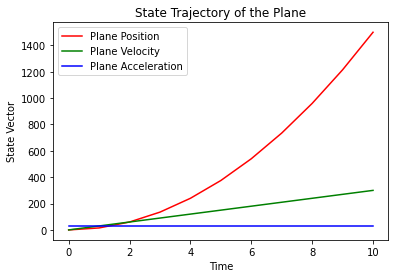

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x0 = np.array([0,0,30])
A = np.array([[1,1,0.5],[0,1,1],[0,0,1]])
states = np.zeros((11,3))
states[0] = x0

# Use for loop to calculate x_t
for t in range(1,11):
  states[t]=A @ states[t-1]
print(states[0])
# Plotting
times = np.arange(0, 11, 1)
plt.plot(times, states[:,0], color='r', label='Plane Position')
plt.plot(times, states[:,1], color='g', label='Plane Velocity')
plt.plot(times, states[:,2], color='b', label='Plane Acceleration')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("State Vector")
plt.title("State Trajectory of the Plane")
  
# Adding legend
plt.legend()
  
# To load the display window
plt.show()


# Problem 3 - Discrete Convolution with Toepliz Matrix (Total Points: 40)

We will now explore convolution via the Toepliz matrix.

Consider the sinusoid signal defined below in the variable `signal`. We seek to convolve it with a triangle. You can think of this as passing a sinusoidal signal through a detector or imaging system with a triangular "point spread function" (PSF). What we measure from the device (the 'image' or 'detection') is the convolution of the signal and the PSF.

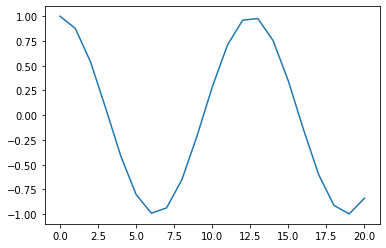

In [3]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 10, 21)
signal = np.cos(time)

plt.plot(signal)

We now seek to convolve this signal vector with the triangular shape given as `g_vec` below:

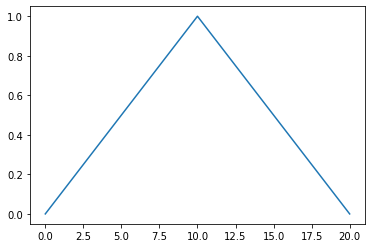

In [4]:
g_vec = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])

plt.plot(g_vec)

Construct the Toepliz matrix representation of `g_vec` and store it in the variable `g_mat`. Calculate the convolution of the signal and detector by computing the product of `g_mat` and `signal`. Plot the resulting convolution against the domain `time`.

**Hint:** `g_mat` will be a matrix with `len(signal) + len(g_vec) - 1` rows and `len(signal)` columns. The first `len(g_vec)` entries in the first column will just be the entries of `g_vec`, the remainder in the column will be zeros. You can construct the Toepliz matrix by shifting these values down in index with each consecutive column, until the `len(g_vec)` column is reached.

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. ]
 [0.9 1.  0.9 0.8 0.7 0.6 0.5 0.

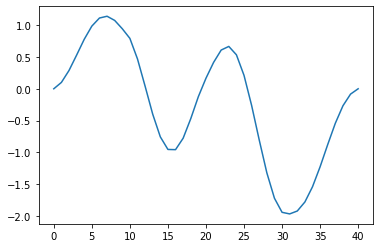

In [5]:
g_mat = np.zeros((len(signal) + len(g_vec) - 1, len(signal)))

# i is rows 
# j is columns
for i in range(len(signal) + len(g_vec) - 1):
    for j in range(len(signal)):
        if i < j:
            g_mat[i][j] = 0 # complete this part
        elif i > len(g_vec)+j-1:
            g_mat[i][j] = 0 # complete this part
        else:
          # since g is symmetrical, the indeces do not need to be read backwards
            g_mat[i][j] = g_vec[i-j] # complete this part
        
# You can check what g_mat looks like by running the code below:
print(g_mat)

# Calculate the product of the matrix g_mat and the vector signal below:
conv_s_g = g_mat @ signal # complete this part

# You can see what your convoluted signal vector looks like by running the code below:
print(conv_s_g)

plt.plot(conv_s_g)

# Check that you correctly computed the convolution by running the code below:
conv_check = np.convolve(g_vec, signal)
print(conv_check)
# using another cell to do plt.plot(conv_check)

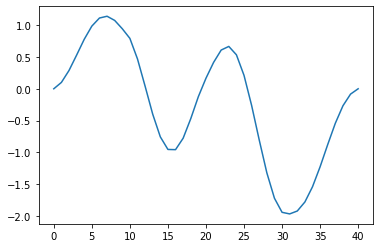

In [6]:
#new cell in order to print check graph
plt.plot(conv_check)